In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix, cohen_kappa_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import math
from joblib import dump, load
from helper import index as slowHelpers
import random
import pickle

from helper import fast as fs
from skimage.restoration import denoise_bilateral
from PIL import Image

In [2]:
def foo(list_of_zones):
    frames = np.empty(len(list_of_zones), dtype=object)
    for i, zone_file_name in enumerate(list_of_zones):
        zone = pd.read_pickle(zone_file_name)
        #mask = masks[i] 
        
        mask = slowHelpers.createBalancedMask(zone["label_3m"].values.reshape((2997,2620)), 3, 5)
        
        mask = np.where(np.invert(mask.reshape(-1)))
        
        zone.drop(zone.index[mask], inplace=True)
        frames[i] = zone
    return pd.concat(frames)

In [3]:
#dataset = foo(["zone_1.pickle","zone_2.pickle","zone_3.pickle","zone_4.pickle","zone_5.pickle","zone_6.pickle", "zone_7.pickle", "zone_9.pickle"])
dataset = foo(["../zones_features/zone_1.pickle", "../zones_features/zone_2.pickle", "../zones_features/zone_3.pickle", "../zones_features/zone_4.pickle", "../zones_features/zone_5.pickle", "../zones_features/zone_6.pickle"])
#dataset = foo(["zone_10.pickle"])

in function
in function
in function
in function
in function
in function


In [4]:
dataset.values.shape

(1294785, 56)

In [5]:
X_train = dataset.loc[:, dataset.columns != "label_3m"]
y_train = dataset["label_3m"]
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.001, random_state=42)

In [7]:
compute_class_weight("balanced", np.array([0,1]), y_train)

array([ 0.84180479,  1.23141163])

In [8]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)


clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
#dump(clf, "classifiers/190416_RF_Classifier_zone_1_2_3_4_5_6_100trees_balanced99percent_55features.joblib")
clf = load("classifiers/190416_RF_Classifier_zone_1_2_3_4_5_6_100trees_balanced99percent_55features.joblib")
#clf = load("classifier_newmask_200.joblib")

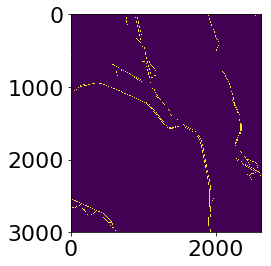

In [28]:
datasetZone10 = pd.read_pickle("../zones_features/zone_6.pickle")
X_test = datasetZone10.loc[:, datasetZone10.columns != "label_3m"]
y_test = datasetZone10["label_3m"]
plt.imshow(y_test.values.reshape((2997,2620)))

In [29]:
X_test

,hpmf_raw,skyview_raw,impundment_raw,slope_raw,DEM_raw,DEM_ditch_detection,DEM_ditch_detection_no_streams,conic_mean,skyview_non_ditch,skyview_gabor,...,slope_non_ditch,slope_mean_2,slope_mean_3,slope_mean_4,slope_mean_6,slope_median_2,slope_median_4,slope_median_6,slope_std_6,slope_skew_2
0,0.02,0.967073,0.099274,9.582833,9.582833,0.000000,0.000000,0.967073,4.000000,0.044330,...,5.338983,9.319108,7.945433,7.058710,8.457231,9.582833,8.553186,8.642749,4.523142,-2.363505
1,0.05,0.972562,0.006317,10.840879,10.840879,0.000000,0.000000,0.918507,4.000000,0.047097,...,5.395480,7.550064,7.387078,7.544505,8.151223,9.559137,8.553186,8.553186,4.416764,-0.865152
2,0.06,0.988628,0.073090,3.525112,3.525112,5.752092,5.752092,0.988628,4.000000,0.052256,...,5.508474,5.805581,6.758293,7.206243,8.094139,4.924606,8.532190,8.732311,4.332870,0.105482
3,0.07,0.975212,0.068573,4.540621,4.540621,4.880911,4.880911,0.975212,4.000000,0.059111,...,5.480226,5.749163,6.251703,6.611702,8.451381,5.308591,6.852867,9.277205,4.083228,0.124017
4,0.07,0.987695,0.010162,5.308591,5.308591,4.171825,4.171825,0.890254,4.000000,0.066762,...,5.649717,5.560283,5.282871,6.152086,8.456992,4.872327,6.041054,9.202034,3.987509,0.428316
5,0.04,0.991431,0.046661,4.639057,4.639057,4.896385,4.896385,0.991431,4.000000,0.074236,...,5.932203,4.315187,5.221165,5.982202,8.368752,4.872327,5.413077,8.968626,3.942598,-0.361590
6,0.01,0.985840,0.069427,2.911544,2.911544,6.623898,6.623898,0.985840,4.000000,0.080645,...,6.214689,4.439970,5.778529,6.584270,8.416842,4.872327,6.852867,8.952439,3.860157,-0.333427
7,0.00,0.986394,0.085999,0.647780,0.647780,8.911861,8.911861,0.986394,4.000000,0.085313,...,6.497175,5.253249,6.212555,6.922868,8.510293,5.031244,7.620166,8.956972,3.643164,0.066455
8,-0.01,0.988885,0.092316,2.490569,2.490569,7.092264,7.092264,0.988885,4.000000,0.087852,...,6.694915,5.757600,6.930482,7.617544,8.833303,6.033251,8.128179,9.055840,3.273499,-0.307140
9,0.00,0.990205,0.048096,5.423430,5.423430,4.159403,4.159403,0.990205,4.000000,0.088185,...,6.949152,6.390369,7.763823,8.736755,9.047310,7.131618,8.984814,9.559642,3.290121,-0.664865


Accuracy score              0.972736222227
Recall score                1.0
Area under curve score(AUC) 0.657426461881
Average precision score(AP) 0.314852923762
ROC                         0.986195152753
Cohen's kappa               0.468793940963
Confusion matrix
 [[7539683  214079]
 [      0   98378]]


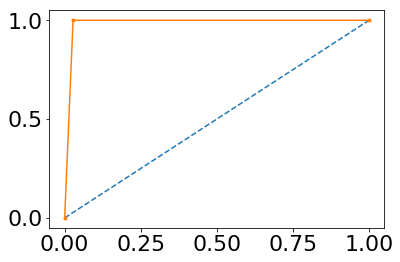

In [30]:
#from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
# auc, average_precision_score, f1_score
y_pred = clf.predict(X_test)
print("Accuracy score             ",accuracy_score(y_test,y_pred))
print("Recall score               ",recall_score(y_test,y_pred))

precision, recall, threshholds = precision_recall_curve(y_test,y_pred)
auc_score = auc(recall, precision)
print("Area under curve score(AUC)", auc_score)
ap = average_precision_score(y_test, y_pred)
print("Average precision score(AP)", ap)
print("ROC                        ", roc_auc_score(y_test, y_pred))

print("Cohen's kappa              ", cohen_kappa_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))


fpr, tpr, thresholds = roc_curve(y_test,y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [17]:
importances = clf.feature_importances_
feature_names = dataset.columns.values.tolist()[1:]
tuple_features = [(feature_names[i], importance) for i, importance in enumerate(importances)]
tuple_features.sort(key=lambda x: x[1], reverse=True)

for f in range(X_test.shape[1]):
    print("{:>2}. {:<20}  {:.2f} %".format(f + 1, tuple_features[f][0], tuple_features[f][1]*100))

 1. impundment_mean_3     6.37 %
 2. impundment_mean_4     5.66 %
 3. impundment_mean_2     5.05 %
 4. hpmf_mean_3           4.20 %
 5. hpmf_mean_4           4.09 %
 6. impundment_median_4   3.65 %
 7. hpmf_mean_6           3.10 %
 8. hpmf_gabor            2.64 %
 9. impundment_median_2   2.63 %
10. hpmf_mean_2           2.60 %
11. impundment_median_6   2.52 %
12. impundment_amplified  2.52 %
13. impundment_mean_6     2.37 %
14. impundment_std_6      2.33 %
15. skyview_gabor         2.33 %
16. impoundment_amplified_no_streams  2.29 %
17. hpmf_gabor_no_streams  2.28 %
18. slope_std_6           2.22 %
19. skyview_gabor_no_streams  2.05 %
20. hpmf_median_2         2.04 %
21. hpmf_std_6            1.66 %
22. skyview_std_6         1.60 %
23. slope_median_6        1.59 %
24. slope_mean_6          1.54 %
25. skyview_non_ditch     1.49 %
26. hpmf_filter           1.33 %
27. slope_non_ditch       1.31 %
28. hpmf_median_4         1.30 %
29. hpmf_filter_no_streams  1.30 %
30. skyview_mean_6      

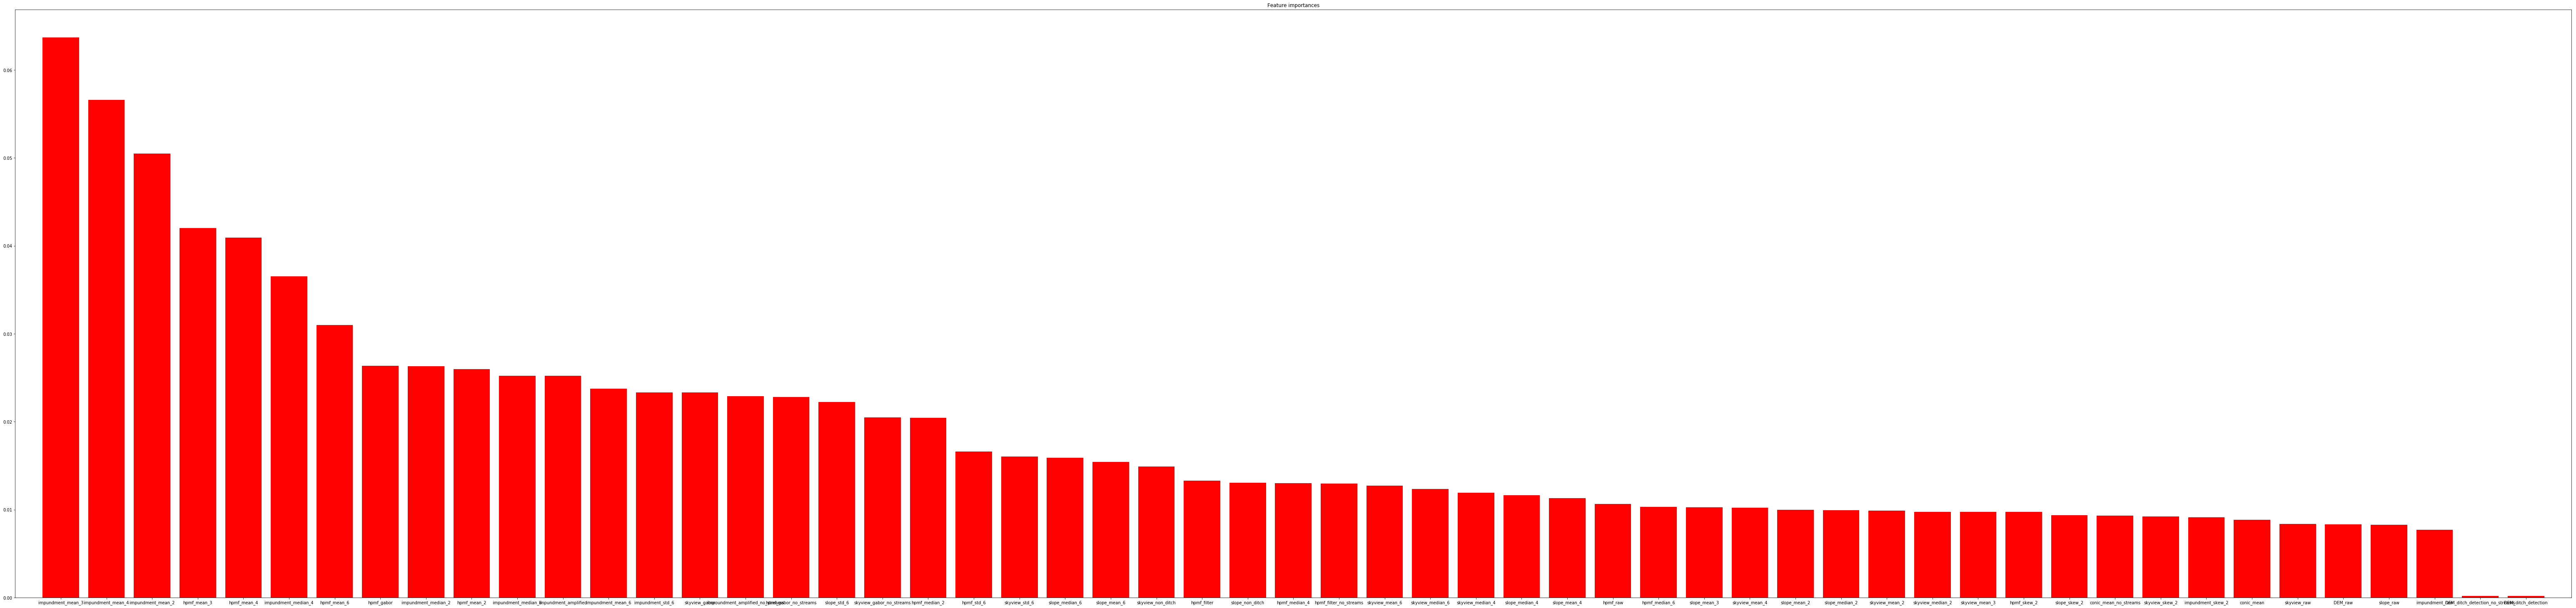

In [18]:
plt.figure(num=None, figsize=(110,26), facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), [x[1] for x in tuple_features],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), [x[0] for x in tuple_features])
plt.xlim([-1, X_train.shape[1]])
plt.show()

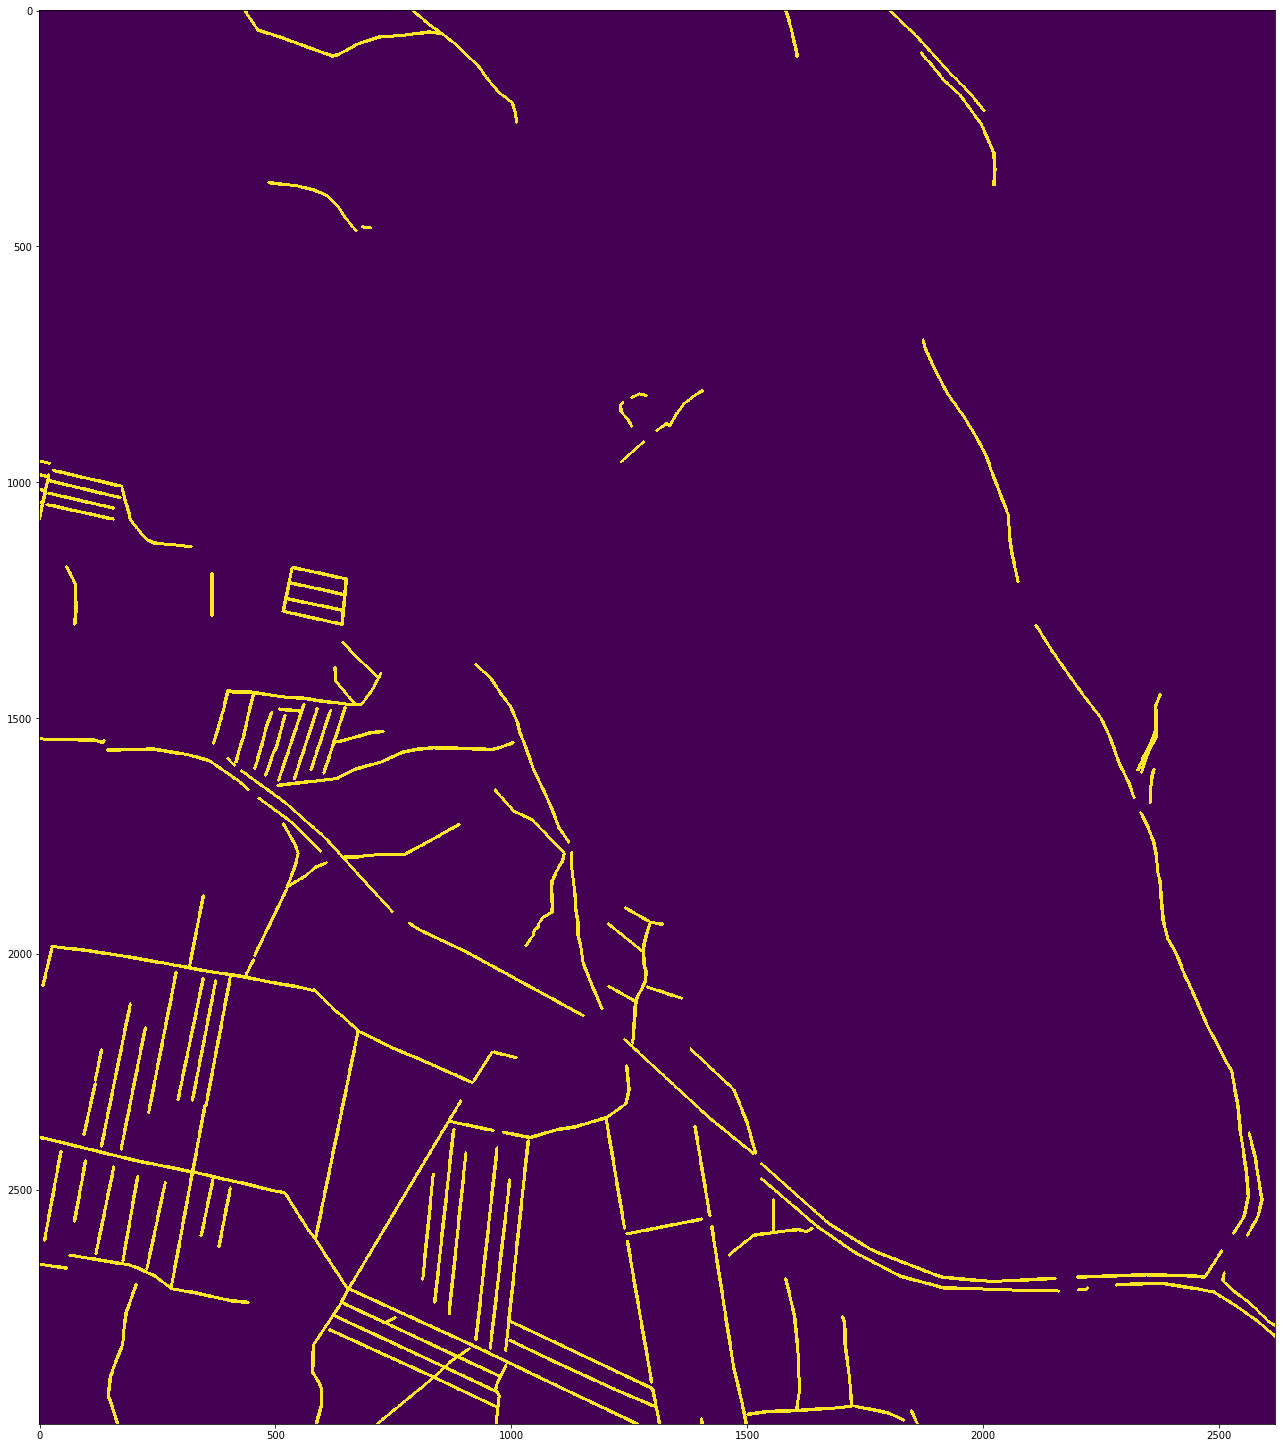

In [19]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(y_test.values.reshape(2997,2620))

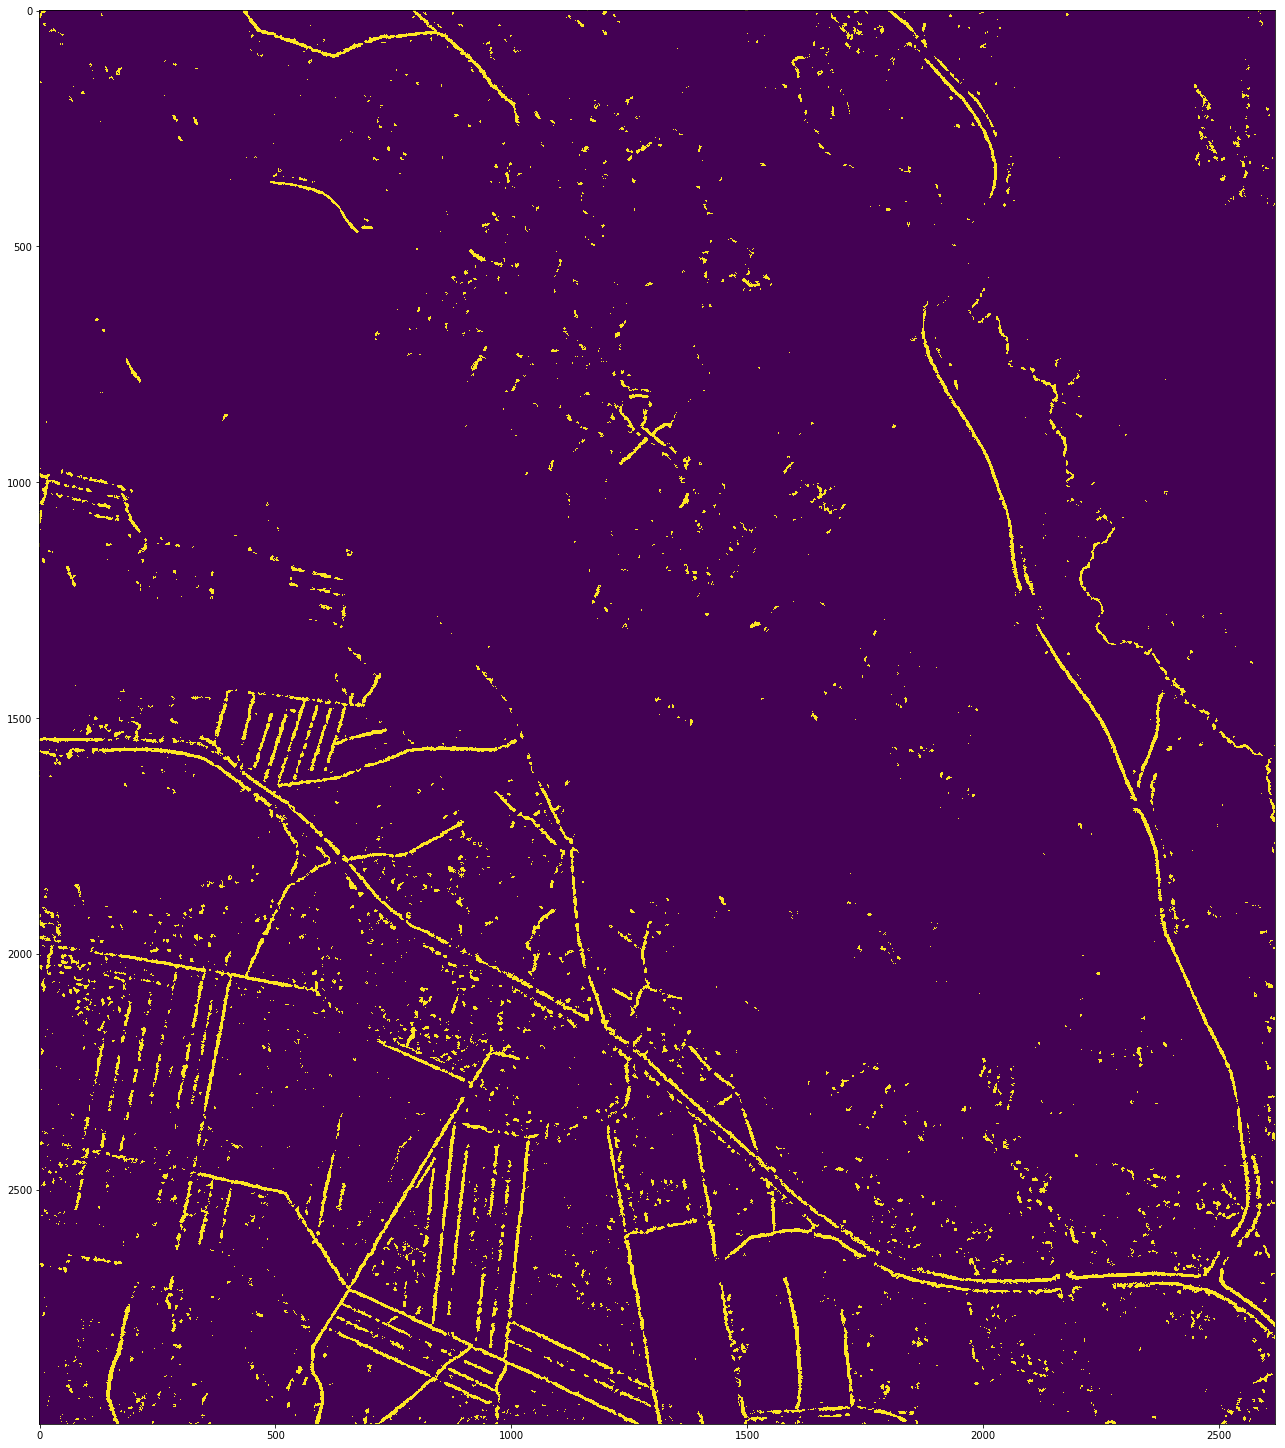

In [53]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(y_pred.reshape(2997,2620))

In [23]:
proba = clf.predict_proba(X_test)[:,1:].reshape(2997,2620)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
#proba[proba > 0.3] = 1
#proba[proba < 0.3] = 0
plt.imshow(proba)

ValueError: Found array with 0 sample(s) (shape=(0, 56)) while a minimum of 1 is required.

In [23]:
np.save("predictions/190416_test/190416_RF_Classifier_zone_1_2_3_4_5_6_100trees_balanced99percent_55features___Prediction_zone_7_proba.npy", proba)

In [2]:
proba = np.load("predictions/190416_test/190416_RF_Classifier_zone_1_2_3_4_5_6_100trees_balanced99percent_55features___Prediction_zone_7_proba.npy")

In [3]:
%%time
proba_post_process = fs.probaPostProcess(proba, 6, 0.25)

started: 10 59
deNoise done: 11 4
gapFill done: 11 5
(2997, 2620)
probaToZone done: 11 5
Wall time: 6min 2s


In [7]:
np.save("predictions/190416_test/post_process.npy", proba_post_process)

In [3]:
proba_post_process = np.load("predictions/190416_test/post_process.npy")

In [6]:
y_testZones = slowHelpers.rasterToZones(np.asarray(y_test).reshape(2997, 2620), 6, 4)

In [7]:
y_testZones1D = y_testZones.reshape(-1)

In [33]:
#y_pred = np.load("predictions/190416_test/step8_islands3.npy").reshape(-1)

Accuracy score              0.956922444073
Recall score                0.768248058681
Area under curve score(AUC) 0.618108832782
Average precision score(AP) 0.361552386197
ROC                         0.866301617287
Cohen's kappa               0.553628777507
Confusion matrix
 [[7285253  269280]
 [  68971  228636]]


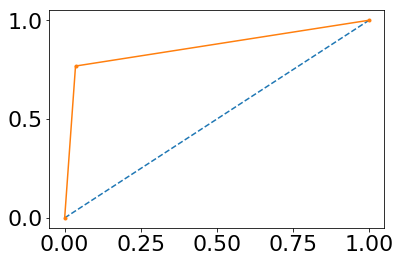

In [34]:
#from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
# auc, average_precision_score, f1_score
y_pred = proba_post_process.astype(int).reshape(-1)
print("Accuracy score             ", accuracy_score(y_testZones1D,y_pred))
print("Recall score               ", recall_score(y_testZones1D,y_pred))

precision, recall, threshholds = precision_recall_curve(y_testZones1D,y_pred)
auc_score = auc(recall, precision)
print("Area under curve score(AUC)", auc_score)
ap = average_precision_score(y_testZones1D, y_pred)
print("Average precision score(AP)", ap)
print("ROC                        ", roc_auc_score(y_testZones1D, y_pred))

print("Cohen's kappa              ", cohen_kappa_score(y_testZones1D,y_pred))
print("Confusion matrix\n", confusion_matrix(y_testZones1D,y_pred))


fpr, tpr, thresholds = roc_curve(y_testZones1D,y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

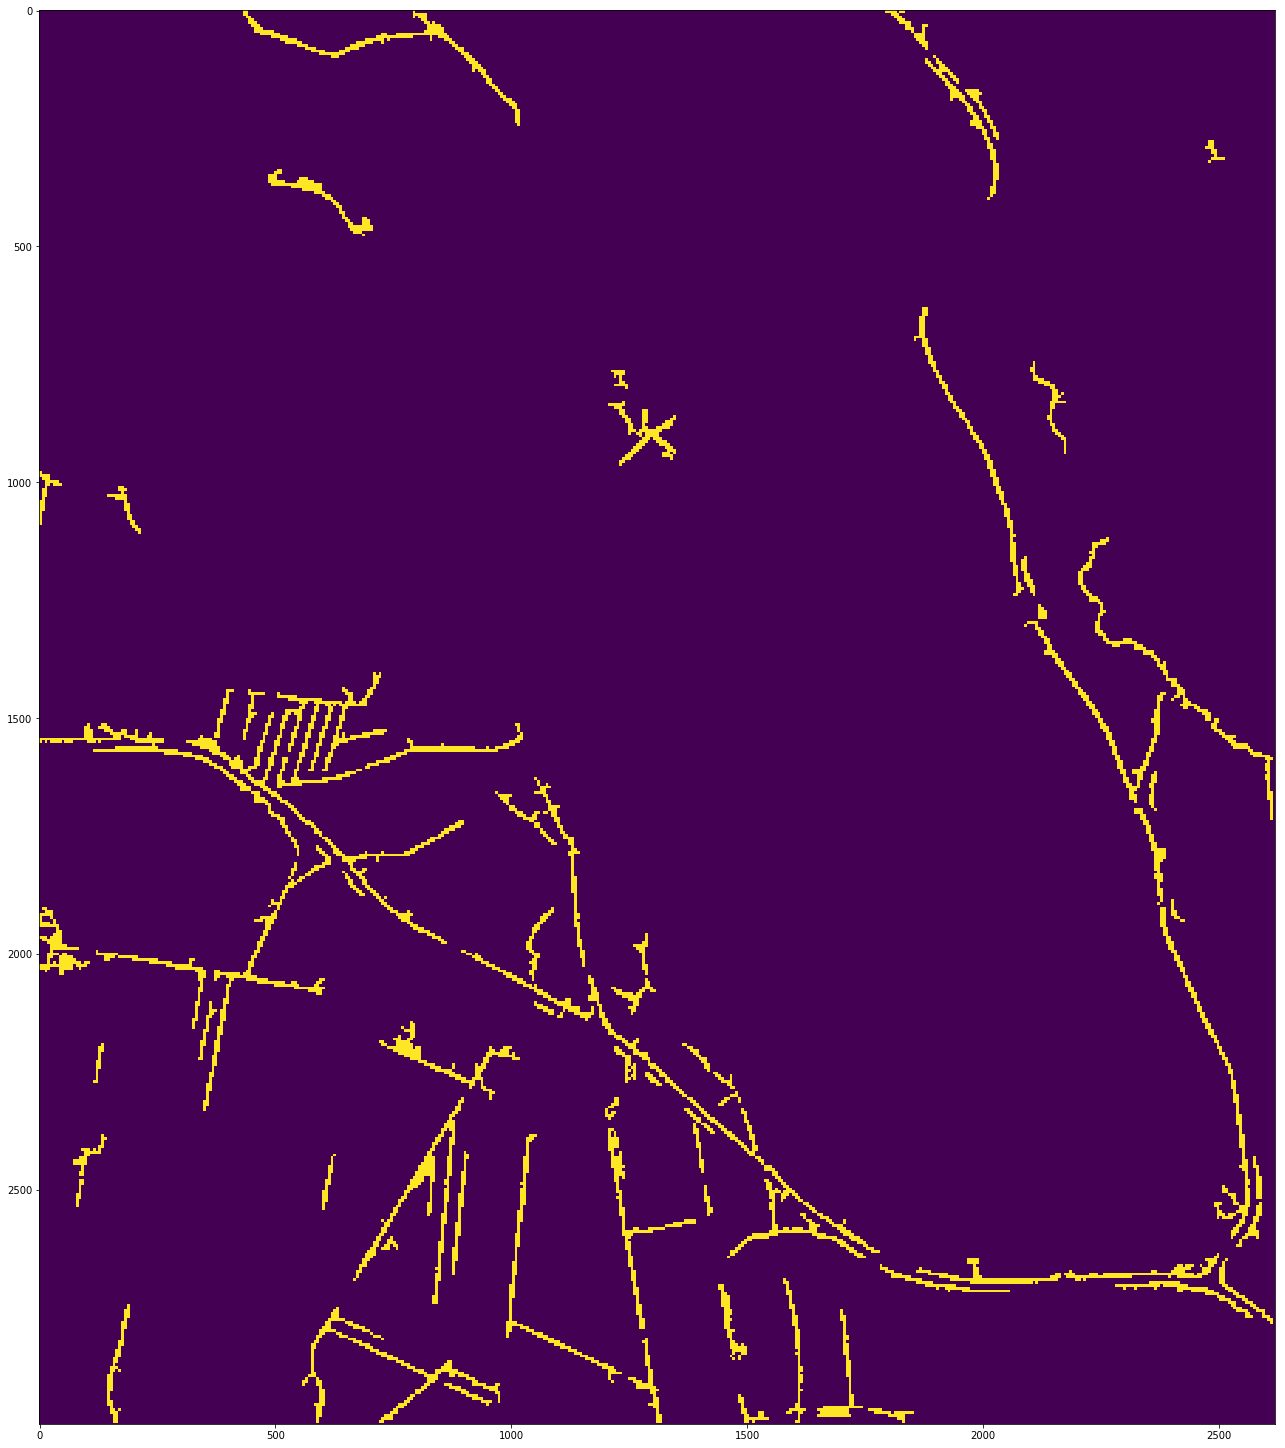

In [9]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(proba_post_process)

In [13]:
displayImg = Image.new("RGB", (2620, 2997), "black")
pixels = displayImg.load()
for i in range(displayImg.size[0]):
    for j in range(displayImg.size[1]):
        if y_testZones[j][i] == 1 and proba_post_process[j][i] == 1:
            pixels[i,j] = (0, 180, 0)
        elif y_testZones[j][i] == 1 and proba_post_process[j][i] == 0:
            pixels[i,j] = (50, 150, 255)
        elif y_testZones[j][i] == 0 and proba_post_process[j][i] == 1:
            pixels[i,j] = (255, 50, 50)

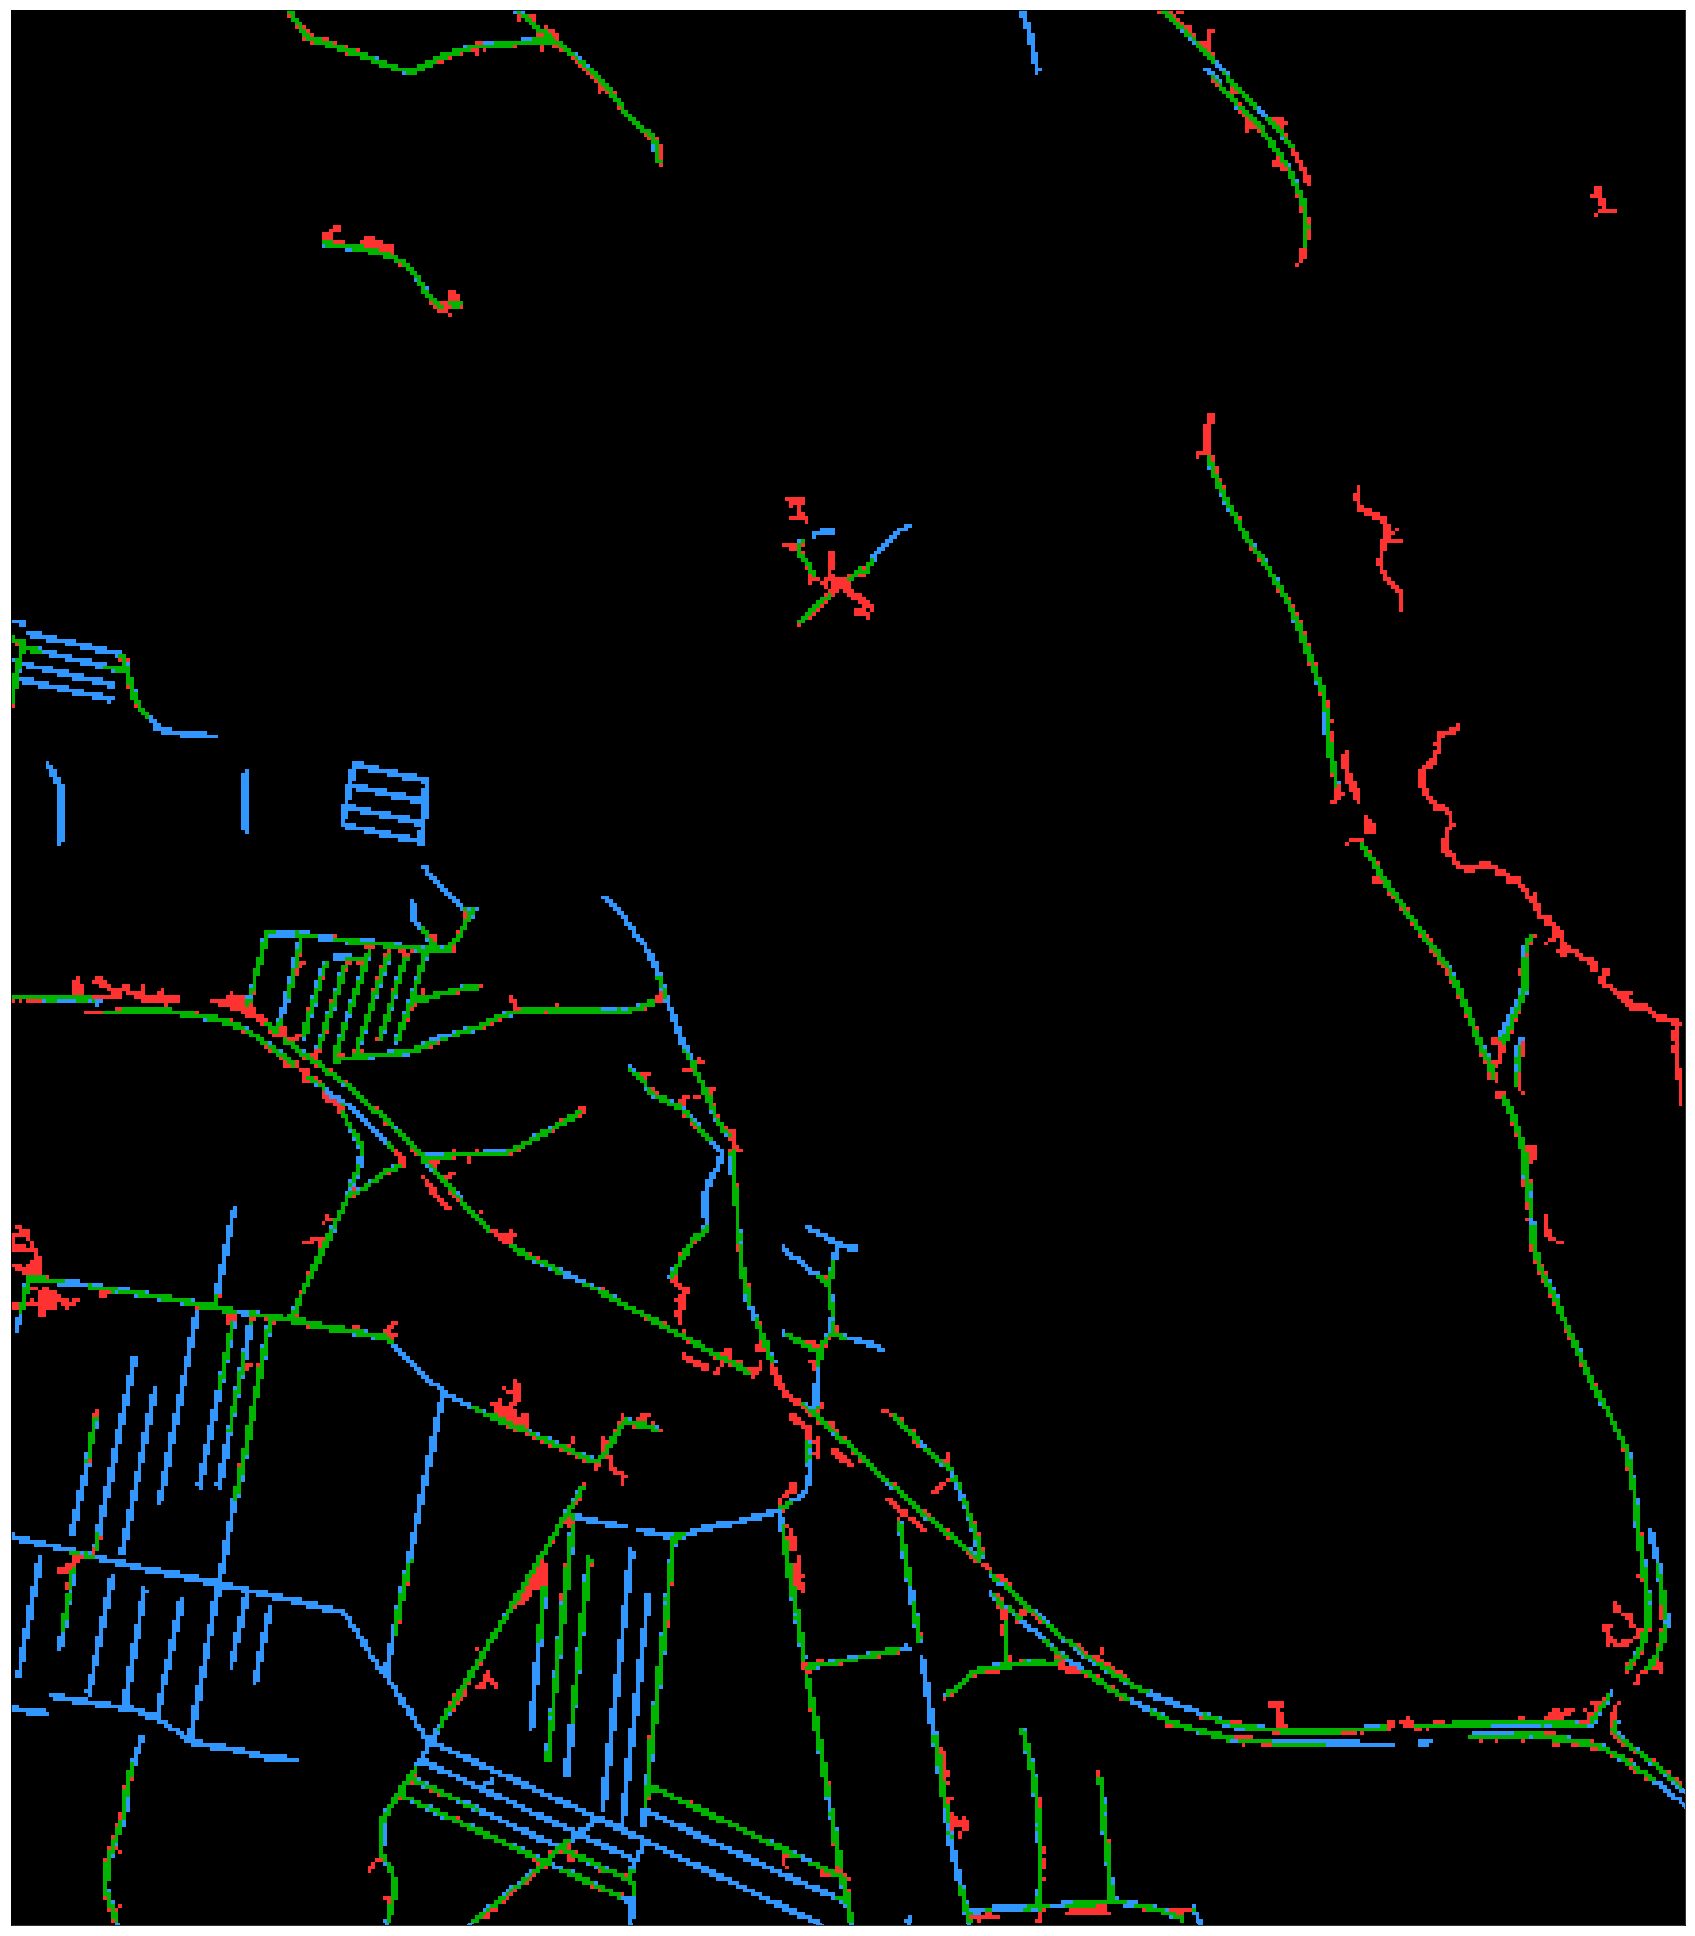

In [14]:
plt.figure(num=None, figsize=(30,180), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size':22})
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.04)

ax[0].imshow(displayImg)

plt.savefig("results.png", format="png", dpi=200, bbox_inches="tight")